**Installing fastai**

In [1]:

! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 188 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 


**Imports**

In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url

In [ ]:
!pip install fastinference

Downloading dataset:

In [9]:
!wget http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip

--2022-04-03 08:44:26--  http://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
Resolving mklab.iti.gr (mklab.iti.gr)... 160.40.50.223
Connecting to mklab.iti.gr (mklab.iti.gr)|160.40.50.223|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip [following]
--2022-04-03 08:44:26--  https://mklab.iti.gr/files/imageblur/CERTH_ImageBlurDataset.zip
Connecting to mklab.iti.gr (mklab.iti.gr)|160.40.50.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4022804823 (3.7G) [application/zip]
Saving to: ‘CERTH_ImageBlurDataset.zip.1’

CERTH_ImageBlurData 100%[===================>]   3.75G  9.23MB/s    in 5m 32s  

utime(CERTH_ImageBlurDataset.zip.1): No such file or directory
2022-04-03 08:49:59 (11.5 MB/s) - ‘CERTH_ImageBlurDataset.zip.1’ saved [4022804823/4022804823]



Unzipping:

In [ ]:
!unzip CERTH_ImageBlurDataset.zip

In [15]:
fns = get_image_files("/content/CERTH_ImageBlurDataset/TrainingSet")

In [16]:
fns

(#1000) [Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/DSC05311.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/P7200570.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/IMG_20120722_131859.jpg'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/DSC01949.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/IMG_0544.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/100_1822.jpg'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/DSC06400.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/CIMG0278.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/P1145801.JPG'),Path('/content/CERTH_ImageBlurDataset/TrainingSet/Undistorted/P1012748.JPG')...]

In [19]:
len(fns)

1000

In [20]:
path=("/content/CERTH_ImageBlurDataset/TrainingSet")

**Datablock for configuring dataset**

In [21]:
images=DataBlock(
    
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(28)
)

**Converting to Dataloaders with Source for Training model**

In [22]:
dls=images.dataloaders(path)

In [28]:
dls.vocab

['Artificially-Blurred', 'Naturally-Blurred', 'Undistorted']

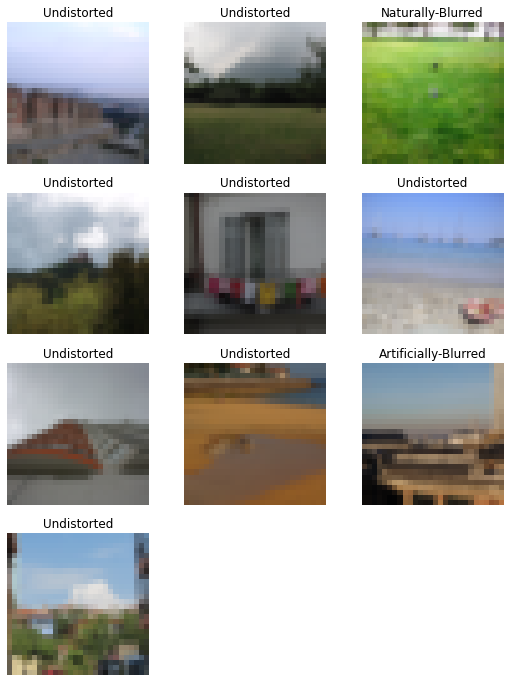

In [23]:
dls.valid.show_batch(max_n=10,nrows=4)

**Augmentation and Transformation:**

In [24]:
images = images.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = images.dataloaders(path)

**Creating and training CNN model with resnet18**

In [26]:
model = cnn_learner(dls, resnet18, metrics=[accuracy])
model.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.580787,0.629984,0.765000,04:43


epoch,train_loss,valid_loss,accuracy,time
0,0.985041,0.449080,0.830000,05:37
1,0.858140,0.460678,0.865000,05:26
2,0.683227,0.399178,0.870000,05:31
3,0.567770,0.409048,0.875000,05:26


**Accuracy=87.5% on testing data**

**Valid_loss<train_loss hence model avoids overfitting**

**Confusion Matrix for Interpretation:**

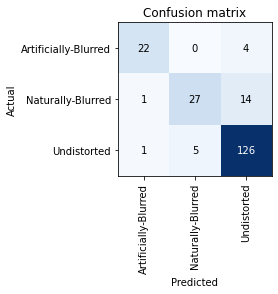

In [27]:
pret = ClassificationInterpretation.from_learner(model)
pret.plot_confusion_matrix()

**Analysis of learning rate**

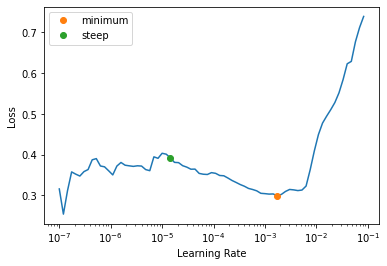

In [29]:
lr_min,lr_steep = model.lr_find(suggest_funcs=(minimum, steep))

**Pickling**

In [30]:
model.export()

In [31]:
path1=Path()
path1.ls(file_exts ='.pkl')

(#1) [Path('export.pkl')]

**Prediction on Evaluation data**

In [32]:
eval_data=get_image_files("/content/CERTH_ImageBlurDataset/EvaluationSet")

In [33]:
test_dl=model.dls.test_dl(eval_data)

In [39]:
preds = model.get_preds(dl=test_dl, with_input=True, with_decoded=True)

Prediction consisting of the probabilities of the prediction of each class for each image.

In [42]:
preds

(TensorImage([[[[ 0.7248,  0.7248,  0.7077,  ..., -0.5424,  0.3652,  0.4508],
           [ 0.7248,  0.7419,  0.7077,  ..., -0.7822,  0.2111,  0.3481],
           [ 0.7419,  0.7419,  0.7248,  ..., -0.8849,  0.0912,  0.2453],
           ...,
           [ 1.0331,  0.9988,  0.9817,  ...,  0.6906,  0.7077,  0.7248],
           [ 1.0673,  1.0502,  0.9988,  ...,  0.7077,  0.7248,  0.7419],
           [ 1.0502,  1.0502,  1.0331,  ...,  0.6563,  0.6734,  0.6906]],
 
          [[ 0.6954,  0.6954,  0.5728,  ..., -0.5826, -0.0049,  0.0301],
           [ 0.7129,  0.6954,  0.6078,  ..., -0.7227, -0.0574, -0.0399],
           [ 0.7129,  0.7129,  0.6253,  ..., -0.8102, -0.1099, -0.1275],
           ...,
           [-0.4601, -0.5126, -0.5301,  ...,  0.9055,  0.9405,  0.9580],
           [-0.4251, -0.4601, -0.4951,  ...,  0.9405,  0.9230,  0.9580],
           [-0.4426, -0.4601, -0.4601,  ...,  0.8880,  0.8880,  0.9055]],
 
          [[ 0.3393,  0.3568,  0.2173,  ..., -0.6367, -0.3055, -0.3230],
        

Prediction on evaluation data set is done

But unable to get accuracy as I'm facing issues and errors in extracting the labels for the data.
Hence assuming testing data accuracy for the model.